In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\Rohit\Desktop\Machine Learning\ExtraCredir\covid19-global-forecasting-week-4\train.csv")
test = pd.read_csv(r"C:\Users\Rohit\Desktop\Machine Learning\ExtraCredir\covid19-global-forecasting-week-4\test.csv")

In [3]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


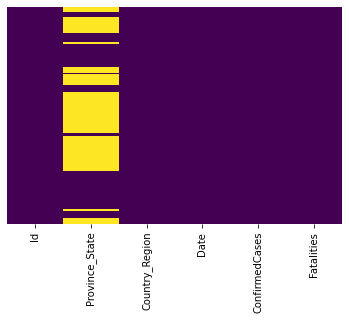

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

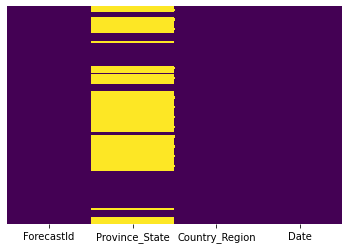

In [6]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.rename(columns={'Country_Region':'Country'}, inplace=True)

In [8]:
train.rename(columns={'Province_State':'State'}, inplace=True)

In [9]:
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)

In [10]:
train.head()

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [11]:
test.rename(columns={'Country_Region':'Country'}, inplace=True)

In [12]:
test.rename(columns={'Province_State':'State'}, inplace=True)

In [13]:
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

In [14]:
test.head()

,ForecastId,State,Country,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [15]:
NaN = "NaN"

def filler(state, country):
    if state == NaN: return country
    return state

X_train = train.copy()

X_train['State'].fillna(NaN, inplace=True)
X_train['State'] = X_train.loc[:, ['State', 'Country']].apply(lambda x : filler(x['State'], x['Country']), axis=1)

X_train.loc[:, 'Date'] = X_train.Date.dt.strftime("%m%d")
X_train["Date"]  = X_train["Date"].astype(int)


X_train.head()

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,122,0.0,0.0
1,2,Afghanistan,Afghanistan,123,0.0,0.0
2,3,Afghanistan,Afghanistan,124,0.0,0.0
3,4,Afghanistan,Afghanistan,125,0.0,0.0
4,5,Afghanistan,Afghanistan,126,0.0,0.0


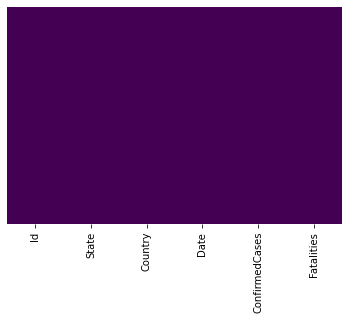

In [16]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
NaN = "NaN"

def filler1(state, country):
    if state == NaN: return country
    return state
X_test = test.copy()

X_test['State'].fillna(NaN, inplace=True)
X_test['State'] = X_test.loc[:, ['State', 'Country']].apply(lambda x : filler1(x['State'], x['Country']), axis=1)

X_test.loc[:, 'Date'] = X_test.Date.dt.strftime("%m%d")
X_test["Date"]  = X_test["Date"].astype(int)

X_test.head()

,ForecastId,State,Country,Date
0,1,Afghanistan,Afghanistan,402
1,2,Afghanistan,Afghanistan,403
2,3,Afghanistan,Afghanistan,404
3,4,Afghanistan,Afghanistan,405
4,5,Afghanistan,Afghanistan,406


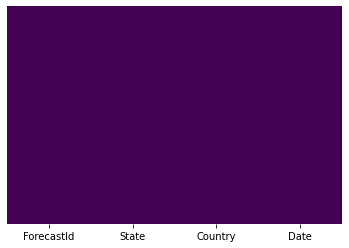

In [18]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
from sklearn import preprocessing

pl = preprocessing.LabelEncoder()

X_train.Country = pl.fit_transform(X_train.Country)
X_train['State'] = pl.fit_transform(X_train['State'])

X_train.head()

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,0,0,122,0.0,0.0
1,2,0,0,123,0.0,0.0
2,3,0,0,124,0.0,0.0
3,4,0,0,125,0.0,0.0
4,5,0,0,126,0.0,0.0


In [20]:
X_test.Country = pl.fit_transform(X_test.Country)
X_test['State'] = pl.fit_transform(X_test['State'])

X_test.head()

,ForecastId,State,Country,Date
0,1,0,0,402
1,2,0,0,403
2,3,0,0,404
3,4,0,0,405
4,5,0,0,406


In [21]:
train.head()
train.loc[train.Country == 'Afghanistan', :]

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
90,91,NaN,Afghanistan,2020-04-21,1092.0,36.0
91,92,NaN,Afghanistan,2020-04-22,1176.0,40.0
92,93,NaN,Afghanistan,2020-04-23,1279.0,42.0
93,94,NaN,Afghanistan,2020-04-24,1351.0,43.0


In [22]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import preprocessing
pl = preprocessing.LabelEncoder()
from xgboost import XGBRegressor
countries = X_train.Country.unique()
dao = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})
for country in countries:
    states = X_train.loc[X_train.Country == country, :].State.unique()
    for state in states:
        X_train_1 = X_train.loc[(X_train.Country == country) & (X_train.State == state), ['State', 'Country', 'Date', 'ConfirmedCases', 'Fatalities']]
        y_train_1 = X_train_1.loc[:, 'ConfirmedCases']
        y_train_2 = X_train_1.loc[:, 'Fatalities']
        
        X_train_1 = X_train_1.loc[:, ['State', 'Country', 'Date']]
        
        X_train_1.Country = pl.fit_transform(X_train_1.Country)
        X_train_1['State'] = pl.fit_transform(X_train_1['State'])
        
        X_test_1 = X_test.loc[(X_test.Country == country) & (X_test.State == state), ['State', 'Country', 'Date', 'ForecastId']]
        
        X_test_1_Id = X_test_1.loc[:, 'ForecastId']
        X_test_1 = X_test_1.loc[:, ['State', 'Country', 'Date']]
        
        X_test_1.Country = pl.fit_transform(X_test_1.Country)
        X_test_1['State'] = pl.fit_transform(X_test_1['State'])
        
        model1 = XGBRegressor(n_estimators=900)
        model1.fit(X_train_1, y_train_1)
        y_pred1 = model1.predict(X_test_1)
        
        model2 = XGBRegressor(n_estimators=900)
        model2.fit(X_train_1, y_train_2)
        y_pred2 = model2.predict(X_test_1)
        
        df = pd.DataFrame({'ForecastId': X_test_1_Id, 'ConfirmedCases': y_pred1, 'Fatalities': y_pred2})
        dao = pd.concat([dao, df], axis=0)

In [23]:
dao.ForecastId = dao.ForecastId.astype('int')
dao.tail()
dao.to_csv('submission.csv', index=False)